# #Import Libraries & set Processing Device

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  # Plotting

import PIL.Image as Image 
import os
import cv2
# Import useful sklearn functions
import sklearn
from sklearn.metrics import cohen_kappa_score, accuracy_score

import time
from tqdm import tqdm_notebook
from torch.optim import lr_scheduler




#Importing torch
import torch
import torch.nn as nn
from torch.nn import Linear, CrossEntropyLoss

import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.models import resnet18

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
print(os.listdir("../input"))
base_dir = "../input/kaggle/input/aptos2019"


['aptos2019']


In [3]:
print(os.listdir("../input/aptos2019"))

['val_images', 'train_images', 'valid.csv', 'test.csv', 'train_1.csv', 'test_images']


In [4]:
#Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


# # Load Data & EDA

In [5]:
#Create Dataset
path = "/kaggle/input/aptos2019/"

train_df = pd.read_csv(f"{path}train_1.csv")
test_df = pd.read_csv(f"{path}test.csv")
valid_df = pd.read_csv(f"{path}valid.csv")

In [6]:
# Length of Train Dataset
print(f'No.of.training_samples: {len(train_df)}')
print(f'No.of.testing_samples: {len(test_df)}')
print(f'No.of.testing_samples: {len(valid_df)}')

No.of.training_samples: 2930
No.of.testing_samples: 366
No.of.testing_samples: 366


In [7]:
train_df.columns
test_df.columns
valid_df.columns

Index(['id_code', 'diagnosis'], dtype='object')

In [8]:
train_df.head(20)

id_code  diagnosis
0   1ae8c165fd53          2
1   1b329a127307          1
2   1b32e1d775ea          4
3   1b3647865779          0
4   1b398c0494d1          0
5   1b4625877527          2
6   1b495ac025b7          3
7   1b862fb6f65d          0
8   1b8701231c8f          0
9   1b8ad0afe9fb          2
10  1bb0ddfe753a          1
11  1bea04b2bb2d          2
12  1bf30c84bbad          4
13  1c0cf251b426          1
14  1c0e5dd1b14c          2
15  1c13a1483f4a          0
16  1c3a6b4449e9          1
17  1c47815f4a6b          0
18  1c4d87baaffc          2
19  1c4f3aa4df06          4

In [9]:
test_df.head(20)

id_code  diagnosis
0   e4dcca36ceb4          0
1   e4e343eaae2a          2
2   e4f12411fd85          4
3   e50b0174690d          0
4   e5197d77ec68          0
5   e529c5757d64          0
6   e52ed5c29c5e          3
7   e540d2e35d15          2
8   e55188915f9d          1
9   e580676516b0          1
10  e582e56e7942          0
11  e594c19e2e1d          0
12  e599151ca14b          2
13  e59c5f345bb0          0
14  e5d56f4f359b          2
15  e5de79795c1d          0
16  e5f332efcbc7          0
17  e5f73f2855c0          0
18  e60e4edb3ca9          0
19  e62490b7d0e9          4

In [10]:
valid_df.head(20)

id_code  diagnosis
0   000c1434d8d7          2
1   001639a390f0          4
2   0024cdab0c1e          1
3   002c21358ce6          0
4   005b95c28852          0
5   0083ee8054ee          4
6   0097f532ac9f          0
7   00a8624548a9          2
8   00b74780d31d          2
9   00cb6555d108          1
10  00cc2b75cddd          0
11  00e4ddff966a          2
12  00f6c1be5a33          0
13  0104b032c141          3
14  0124dffecf29          1
15  0125fbd2e791          0
16  012a242ac6ff          2
17  014508ccb9cb          0
18  0151781fe50b          0
19  0161338f53cc          2

In [11]:
# EDA ()
print('train_description:' ,train_df.describe())
print('---information:',train_df.info())
print('----checking misvalues:', train_df.isnull().sum())
print('------Data_type:' ,train_df.dtypes)
print('______________len od df_train:', len(train_df))

train_description:          diagnosis
count  2930.000000
mean      1.131058
std       1.295220
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    2930 non-null   object
 1   diagnosis  2930 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.9+ KB
---information: None
----checking misvalues: id_code      0
diagnosis    0
dtype: int64
------Data_type: id_code      object
diagnosis     int64
dtype: object
______________len od df_train: 2930


In [12]:
# EDA 
print('test_description:', test_df.describe())
print('---information:', test_df.info())
print('-----------checking misvalues:',test_df.isnull().sum())
print('----------------Data_type:', test_df.dtypes)
print('_____________________len of df_test:',len(test_df))

test_description:         diagnosis
count  366.000000
mean     1.057377
std      1.334264
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    366 non-null    object
 1   diagnosis  366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
---information: None
-----------checking misvalues: id_code      0
diagnosis    0
dtype: int64
----------------Data_type: id_code      object
diagnosis     int64
dtype: object
_____________________len of df_test: 366


In [13]:
# EDA 
print('test_description:', valid_df.describe())
print('---information:', valid_df.info())
print('-----------checking misvalues:',valid_df.isnull().sum())
print('----------------Data_type:', valid_df.dtypes)
print('_____________________len of df_test:',len(valid_df))

test_description:         diagnosis
count  366.000000
mean     1.163934
std      1.288690
min      0.000000
25%      0.000000
50%      1.000000
75%      2.000000
max      4.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    366 non-null    object
 1   diagnosis  366 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
---information: None
-----------checking misvalues: id_code      0
diagnosis    0
dtype: int64
----------------Data_type: id_code      object
diagnosis     int64
dtype: object
_____________________len of df_test: 366


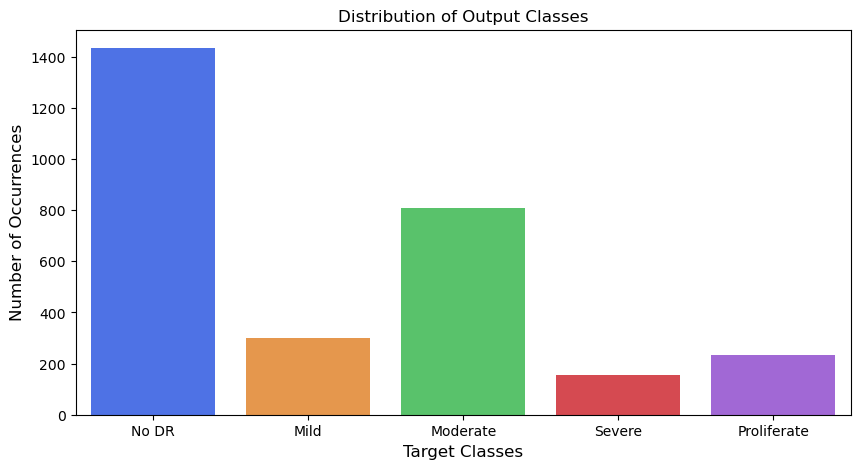

In [14]:
#Distribution of Output Classes
counts = train_df['diagnosis'].value_counts()
class_list = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferate']
for i,x in enumerate(class_list):
    counts[x] = counts.pop(i)
    
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, alpha=0.8, palette='bright') #the sns.barplot() function creates a bar plot with the specified properties. 
plt.title('Distribution of Output Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Target Classes', fontsize=12)
plt.show()

# Visualizing Training Data

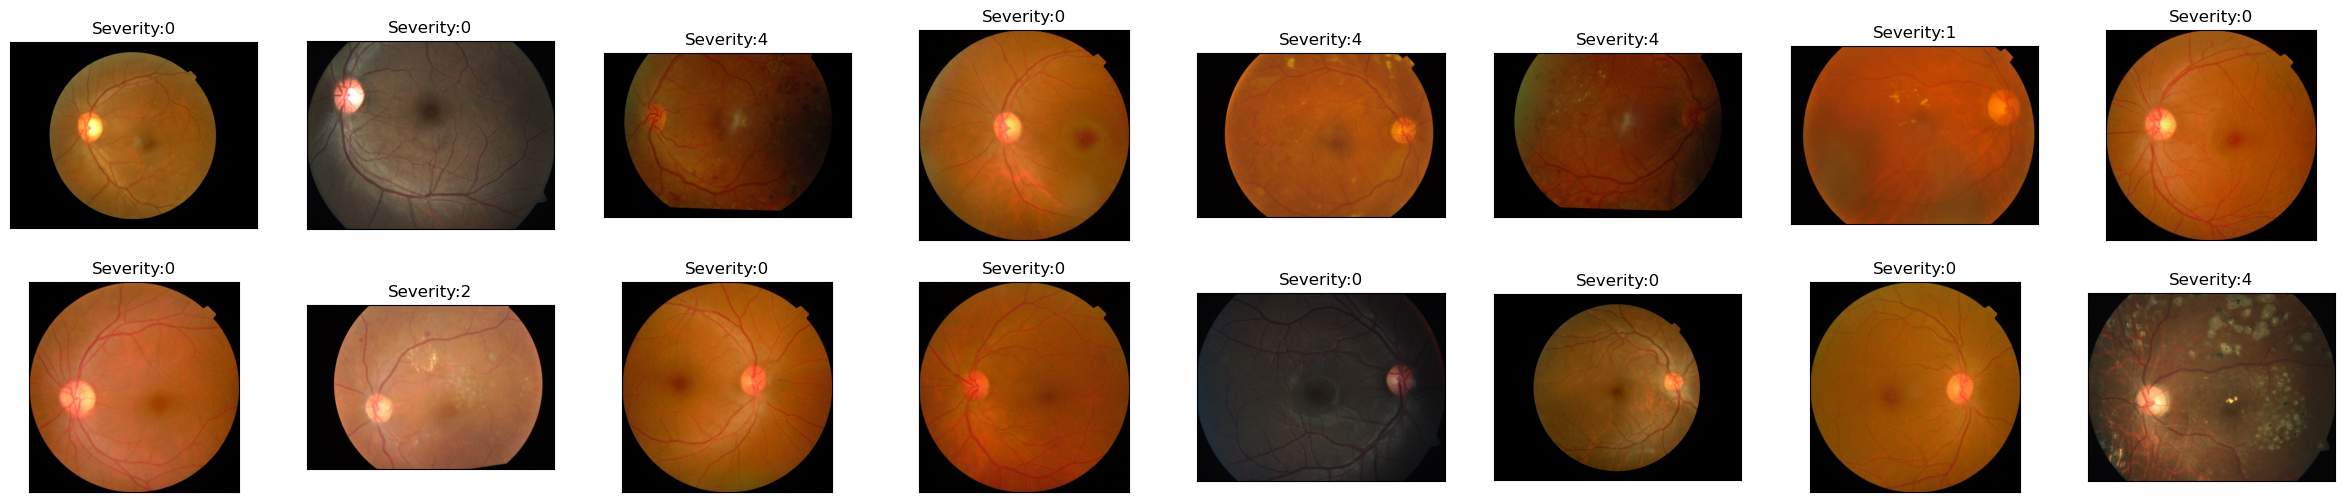

In [15]:
fig=plt.figure(figsize=(30,6))
#display 20 images:
train_imgs=os.listdir("/kaggle/input/aptos2019/train_images/train_images")
for index,img in enumerate (np.random.choice(train_imgs, 16)): #Iterates over a randomly chosen subset of 16 images from the "train_imgs" list
    ax=fig.add_subplot(2, 8, index+1, xticks=[] , yticks=[])
    im=Image.open( "/kaggle/input/aptos2019/train_images/train_images/"+img) #Opens the image using the PIL library
    plt.imshow(im)
    lab=train_df.loc[train_df['id_code'] == img.split('.')[0] , 'diagnosis'].values[0]
    ax.set_title('Severity:%s' %lab)

# Visualizing Test Set

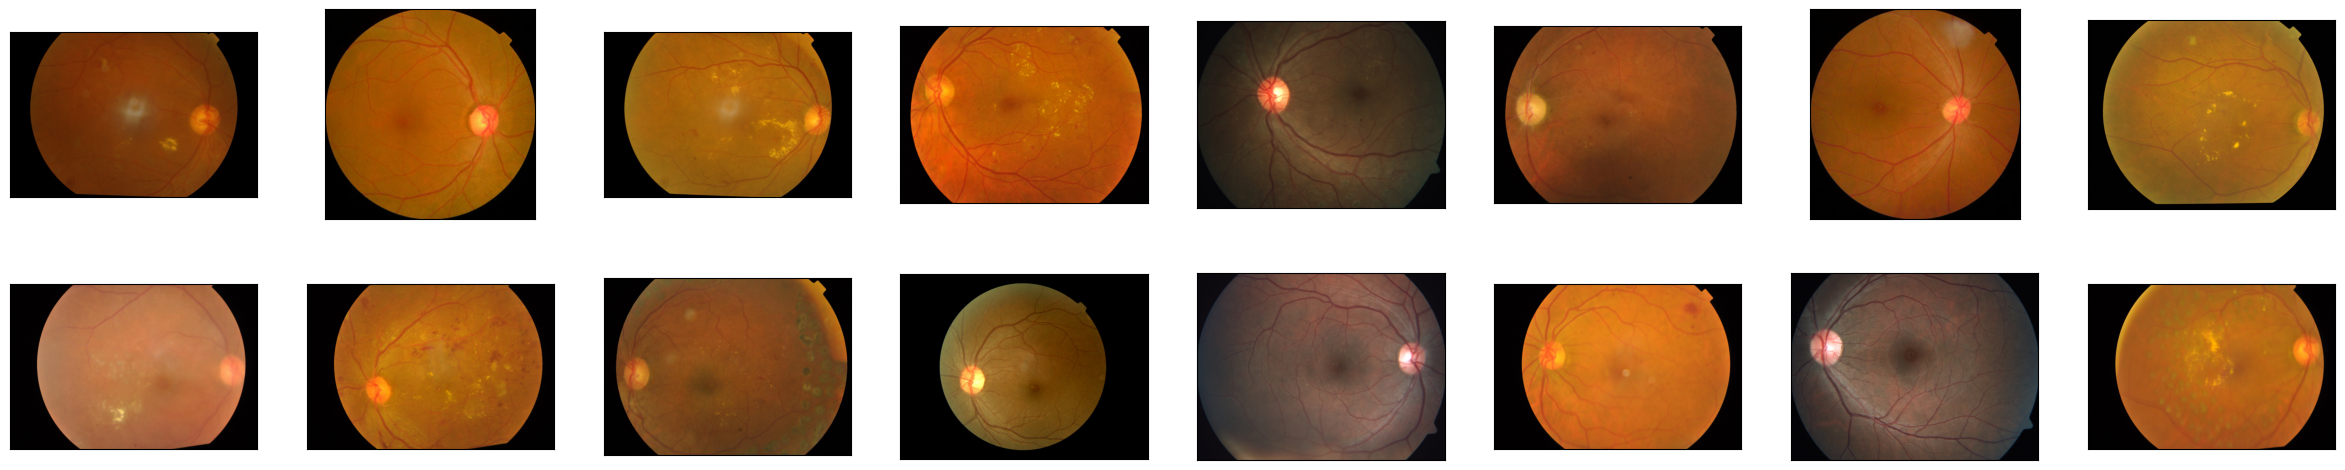

In [16]:
fig=plt.figure(figsize=(30,6))
#display 20 images:
test_imgs=os.listdir("/kaggle/input/aptos2019/test_images/test_images")
for index, img in enumerate(np.random.choice(test_imgs, 16)):
    ax = fig.add_subplot(2, 16//2, index+1, xticks=[], yticks=[])
    im=Image.open("/kaggle/input/aptos2019/test_images/test_images/" +img)
    plt.imshow(im)

# Visualizing Valid Set

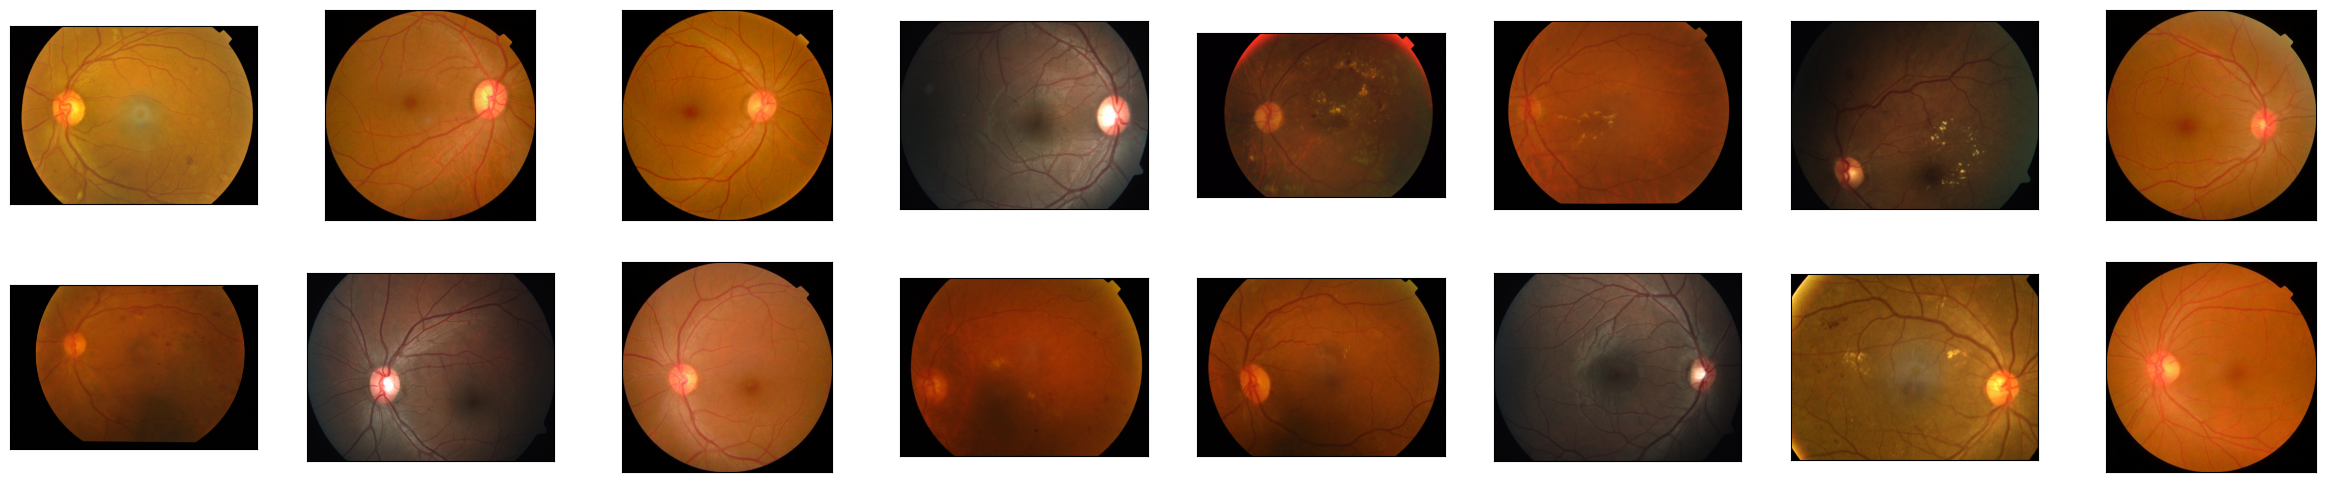

In [17]:
fig=plt.figure(figsize=(30,6))
#display 20 images:
test_imgs=os.listdir("/kaggle/input/aptos2019/val_images/val_images")
for index, img in enumerate(np.random.choice(test_imgs, 16)):
    ax = fig.add_subplot(2, 16//2, index+1, xticks=[], yticks=[])
    im=Image.open("/kaggle/input/aptos2019/val_images/val_images/" +img)
    plt.imshow(im)

# Data Processing

In [18]:
# Our own custom class for datasets
class CreateDataset(Dataset):
    def __init__(self, df_data, data_dir = '../input/', transform=None):
        super().__init__()
        self.df = df_data.values
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img_name,label = self.df[index]
        img_path = os.path.join(self.data_dir, img_name+'.png')
        image = cv2.imread(img_path)
        if self.transform is not None:
            image = self.transform(image)
        return image, label
        

In [19]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.4),
    #transforms.ColorJitter(brightness=2, contrast=2),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [20]:
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

In [21]:
train_path = "/kaggle/input/aptos2019/train_images/train_images"
test_path = "/kaggle/input/aptos2019/test_images/test_images/"

In [22]:
train_data = CreateDataset(df_data=train_df, data_dir=train_path, transform=train_transforms)
test_data = CreateDataset(df_data=test_df, data_dir=test_path, transform=test_transforms)

In [23]:
valid_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [24]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [25]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64,sampler=train_sampler)
validloader = torch.utils.data.DataLoader(train_data, batch_size=64, sampler=valid_sampler)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [26]:
print(f"training examples contain : {len(train_data)}")
print(f"testing examples contain : {len(test_data)}")

print(len(trainloader))
print(len(validloader))
print(len(testloader))

training examples contain : 2930
testing examples contain : 366
37
10
6


In [27]:
# LOAD ONE BATCH OF TESTING SET TO CHECK THE IMAGES AND THEIR LABELS
images, labels = next(iter(trainloader))

# Checking shape of image
print(f"Image shape : {images.shape}")
print(f"Label shape : {labels.shape}")

# denormalizing images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

Image shape : torch.Size([64, 3, 224, 224])
Label shape : torch.Size([64])


labels: tensor([0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 2, 4, 2, 0, 0, 0, 3, 0, 4, 0, 2, 1, 4, 4,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
        1, 3, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 3, 4, 0])


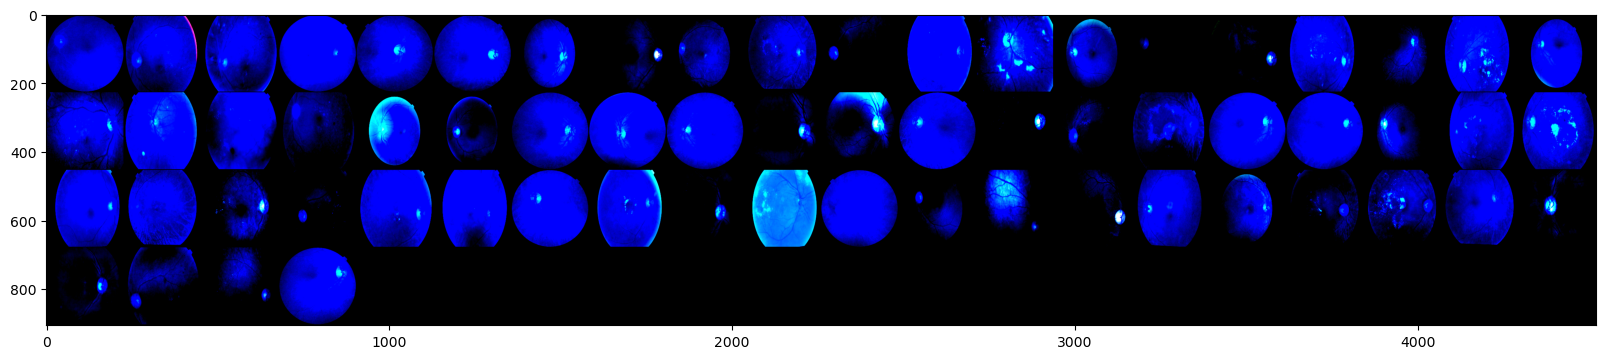

In [28]:
# plotting the images of loaded batch with given fig size and frame data    
import torchvision
import matplotlib.pyplot as plt
import numpy as np
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (20, 20))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   
print('labels:', labels)  

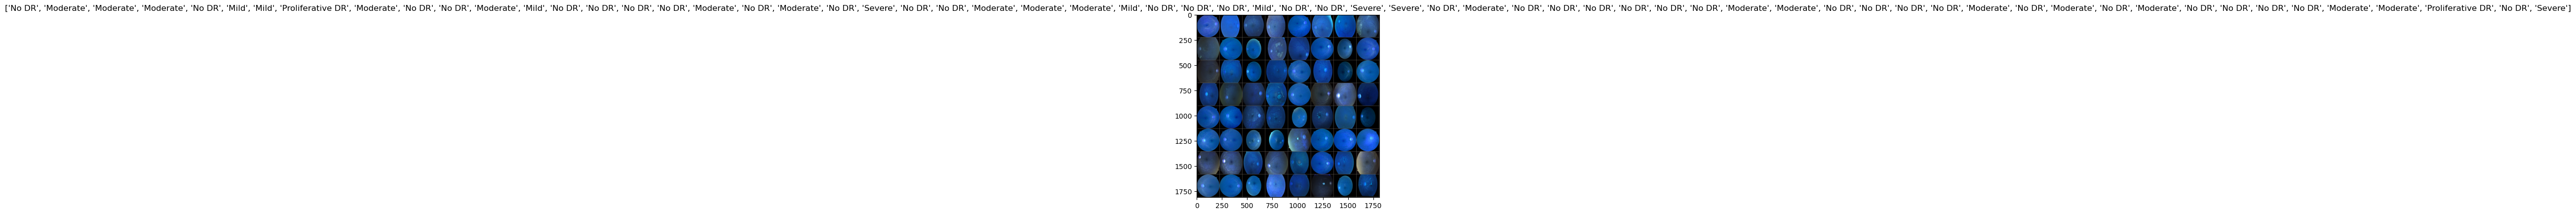

In [29]:
class_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']

images, labels = next(iter(trainloader))
out = torchvision.utils.make_grid(images)
imshow(out, title=[class_names[x] for x in labels])

# #Build Model, Optimizer and Loss Function

In [30]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet152(pretrained=True) 

num_ftrs = model.fc.in_features 
out_ftrs = 5 
  
model.fc = nn.Sequential(nn.Linear(num_ftrs, 512),nn.ReLU(),nn.Linear(512,out_ftrs),nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.00001) 

scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
model.to(device);

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
model_save_name = 'classifier.pt'
path = F"/kaggle/working/{model_save_name}"

In [33]:
# to unfreeze more layers 
for name,child in model.named_children():
  if name in ['layer2','layer3','layer4','fc']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

conv1is frozen
bn1is frozen
reluis frozen
maxpoolis frozen
layer1is frozen
layer2is unfrozen
layer3is unfrozen
layer4is unfrozen
avgpoolis frozen
fcis unfrozen


In [34]:
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.000001) 
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [35]:
def load_model(path):
  checkpoint = torch.load(path)
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  return model

In [36]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# #Training and Testing

In [37]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of trainable parameters: \n{}".format(pytorch_total_params))

Number of trainable parameters: 
58970117


In [38]:
def train_and_test(e):
    epochs = e
    train_losses , test_losses, acc = [] , [], []
    valid_loss_min = np.Inf 
    model.train()
    print("Model Training started.....")
    for epoch in range(epochs):
      running_loss = 0
      batch = 0
      for images , labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        batch += 1
        if batch % 10 == 0:
            print(f" epoch {epoch + 1} batch {batch} completed") 
      test_loss = 0
      accuracy = 0
      with torch.no_grad():
        print(f"validation started for {epoch + 1}")
        model.eval() 
        for images , labels in validloader:
          images, labels = images.to(device), labels.to(device)
          logps = model(images) 
          test_loss += criterion(logps,labels) 
          ps = torch.exp(logps)
          top_p , top_class = ps.topk(1,dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(validloader))
      acc.append(accuracy)
      scheduler.step()
      print("Epoch: {}/{}.. ".format(epoch+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Valid Loss: {:.3f}.. ".format(test_loss/len(validloader)),
        "Valid Accuracy: {:.3f}".format(accuracy/len(validloader)))
      model.train() 
      if test_loss/len(validloader) <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,test_loss/len(validloader))) 
        torch.save({
            'epoch': epoch,
            'model': model,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': valid_loss_min
            }, path)
        valid_loss_min = test_loss/len(validloader)    
    print('Training Completed Succesfully !')    
    return train_losses, test_losses, acc 

In [44]:
train_losses, valid_losses, acc = train_and_test(5)

Model Training started.....
 epoch 1 batch 10 completed
 epoch 1 batch 20 completed
 epoch 1 batch 30 completed
validation started for 1
Epoch: 1/5..  Training Loss: 0.998..  Valid Loss: 1.016..  Valid Accuracy: 0.735
Validation loss decreased (inf --> 1.016491).  Saving model ...
 epoch 2 batch 10 completed
 epoch 2 batch 20 completed
 epoch 2 batch 30 completed
validation started for 2
Epoch: 2/5..  Training Loss: 0.994..  Valid Loss: 1.004..  Valid Accuracy: 0.729
Validation loss decreased (1.016491 --> 1.003739).  Saving model ...
 epoch 3 batch 10 completed
 epoch 3 batch 20 completed
 epoch 3 batch 30 completed
validation started for 3
Epoch: 3/5..  Training Loss: 0.987..  Valid Loss: 1.022..  Valid Accuracy: 0.711
 epoch 4 batch 10 completed
 epoch 4 batch 20 completed
 epoch 4 batch 30 completed
validation started for 4
Epoch: 4/5..  Training Loss: 0.981..  Valid Loss: 0.976..  Valid Accuracy: 0.753
Validation loss decreased (1.003739 --> 0.975846).  Saving model ...
 epoch 5 b

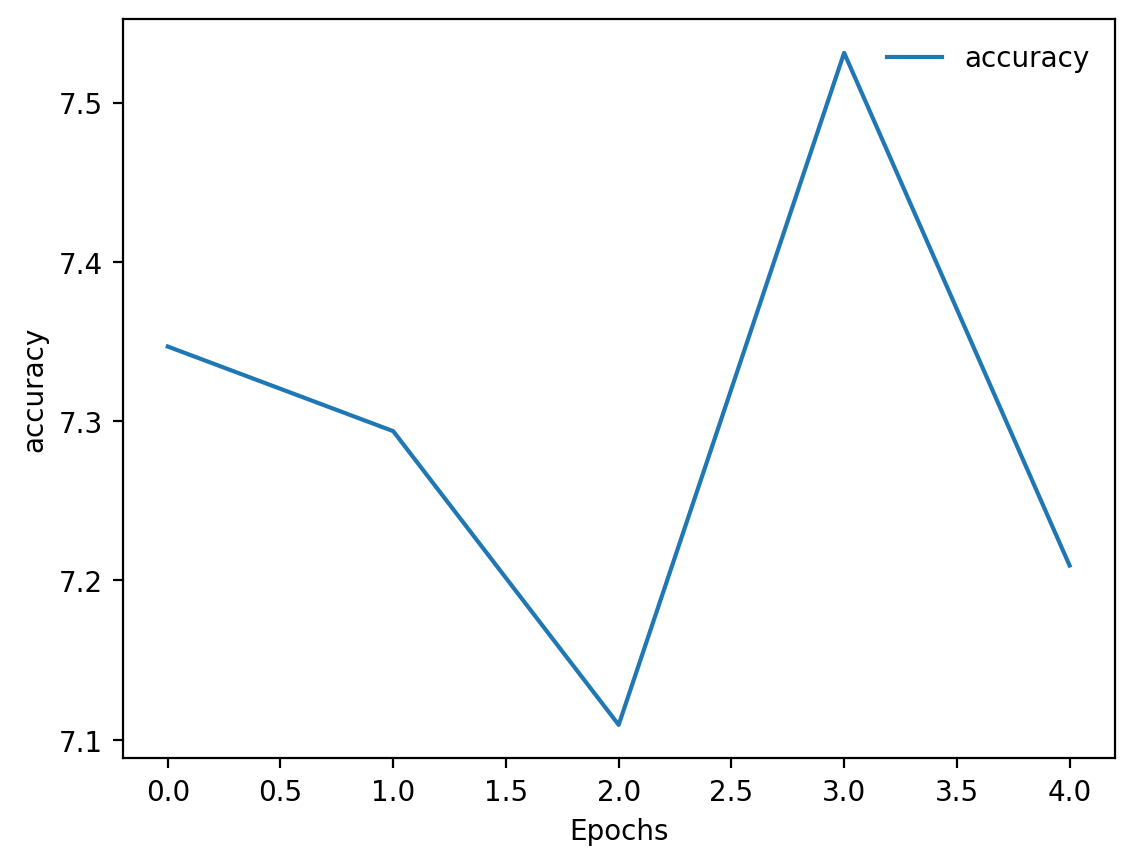

In [86]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.plot(acc, label='accuracy')
plt.legend("")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(frameon=False)